<a href="https://colab.research.google.com/github/Tanvii26/Research-Probation/blob/main/222_Tanvi_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report, confusion_matrix

---
#Linear Regression from Scratch
---

In [ ]:
df = pd.read_csv('/content/ass3.csv')
df.head()

,Unnamed: 0,avg_shares,avg_comments,avg_expert,popularity_score
0,19,147.3,23.9,19.1,14.6
1,91,28.6,1.5,33.0,7.3
2,166,17.9,37.6,21.6,8.0
3,196,94.2,4.9,8.1,9.7
4,42,293.6,27.7,1.8,20.7


--Preprocessing--

In [ ]:
df.isnull().sum()

Unnamed: 0          0
avg_shares          1
avg_comments        4
avg_expert          0
popularity_score    0
dtype: int64

In [ ]:
df['avg_shares'] = df['avg_shares'].fillna(df.avg_shares.mean())

df['avg_comments'] = df['avg_comments'].fillna(df.avg_comments.mean())

In [ ]:
df.isnull().sum()

Unnamed: 0          0
avg_shares          0
avg_comments        0
avg_expert          0
popularity_score    0
dtype: int64

--Defining Regression Algorithm--


In [ ]:
from math import sqrt
def LinearRegression(X_train, y_train, X_test, y_test):
  train_sample, train_features = X_train.shape

  # pre - init
  w = np.zeros(train_features)
  b = 0
  costs=[]

  n_itr = 100
  rate = 0.0001

  for i in range(n_itr):
    #predicted target values obtained by multiplying the feature matrix with the weights and adding the bias term.
    y_pred = np.dot(X_train, w) + b

    # gradient calculation
    #sum up the weighted errors for each feature to normalize the gradients 
    gradw = (1/train_sample) * np.dot(X_train.T, (y_pred - y_train))
    #change required for the bias term to minimize the cost function - sum of errors then scale the gradient
    gradb = (1/train_sample) * np.sum(y_pred - y_train)

    # coefficients updation
    w = w- rate*gradw
    b = b-rate*gradb

    cost = (1/(2*train_sample)) * np.sum(np.square(y_pred - y_train))
    print("Cost function: ",cost)
    costs.append(cost)

  # evaluating our model training
  y_pred_test = np.dot(X_test, w) + b
  mse = mean_squared_error(y_pred_test, y_test)
  rmse = sqrt(mse)
  mae = mean_absolute_error(y_pred_test, y_test)

  r2 = r2_score(y_pred_test, y_test)
  adj_r2 = 1-(1- r2) * (len(y_test) - 1)/ (len(y_test) - X_test.shape[1]-1)

  return w, b, costs, mse, rmse, mae, r2, adj_r2


--Data Test and Train Split--

In [ ]:
from sklearn.model_selection import train_test_split
X_lr = df[['avg_comments','avg_shares','avg_expert']].values
y_lr = df['popularity_score'].values


X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr, test_size=0.20, random_state = 0)


--Training the model--

In [ ]:
wgt, bias ,costs, mse, rmse, mae, r2, adj_r2 = LinearRegression(X_train, y_train, X_test, y_test)

Cost function:  106.6818125
Cost function:  376.39013018391324
Cost function:  1403.5812856229213
Cost function:  5307.982784178908
Cost function:  20142.19677234563
Cost function:  76496.98036723389
Cost function:  290582.3897469985
Cost function:  1103864.2453396337
Cost function:  4193409.6255274247
Cost function:  15930162.370121533
Cost function:  60516449.15765039
Cost function:  229893531.9114808
Cost function:  873333435.3884077
Cost function:  3317671844.913528
Cost function:  12603372384.978788
Cost function:  47878453028.5558
Cost function:  181883562177.81705
Cost function:  690950273024.1411
Cost function:  2624823673351.765
Cost function:  9971338872266.904
Cost function:  37879724994515.69
Cost function:  143899789591065.84
Cost function:  546655221159925.25
Cost function:  2076666905981105.2
Cost function:  7888967801764584.0
Cost function:  2.996908786769329e+16
Cost function:  1.1384838298118355e+17
Cost function:  4.324941207637716e+17
Cost function:  1.6429848153938

--Model Evaluation--

In [ ]:
for i, w in enumerate(wgt):
  print(f'Weight {i+1} {w}')
print("Bias: ", {bias})

Weight 1 -9.065597940814175e+26
Weight 2 -7.629828434506796e+27
Weight 3 -1.2243849527364476e+27
Bias:  {-3.953400034969269e+25}


In [ ]:
# evaluation factors obtained
print(f'Mean Squared Error = {mse}')
print(f'Root Mean Squared Error = {rmse}')
print(f'Mean Absolute Error = {mae}')


Mean Squared Error = 1.999808353421349e+60
Root Mean Squared Error = 1.414145803452158e+30
Mean Absolute Error = 1.2484558615934974e+30


---
# Linear Regression using library
--- 

In [ ]:
from sklearn.linear_model import LinearRegression

# instantiate LR model and fit into the training data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# get performance coefficients

weight_lr = lr_model.coef_
bias_lr = lr_model.intercept_

for i, wt in enumerate(weight_lr):
  print(f'Weight {i+1} {wt}')
print(f'Bias: {bias_lr}')

Weight 1 0.1864119387830813
Weight 2 0.045601153466801506
Weight 3 -0.0009391483830564137
Bias: 2.8897820893409527


--Predicting on Test Data--

In [ ]:
y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_pred_lr, y_test)
rmse_lr = sqrt(mse_lr)
mae_lr = mean_absolute_error(y_pred_lr, y_test)
r2_lr = r2_score(y_pred_lr, y_test)
adj_r2_lr = 1-(1-r2_lr) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [ ]:
# evaluation factors obtained
print(f'Mean Squared Error = {mse_lr}')
print(f'Root Mean Squared Error = {rmse_lr}')
print(f'Mean Absolute Error = {mae_lr}')


Mean Squared Error = 2.5630432249107913
Root Mean Squared Error = 1.6009507253225477
Mean Absolute Error = 1.3221037363395987


---
# 3. Comparison of two models
---

A. Comparing the coefficients obtained

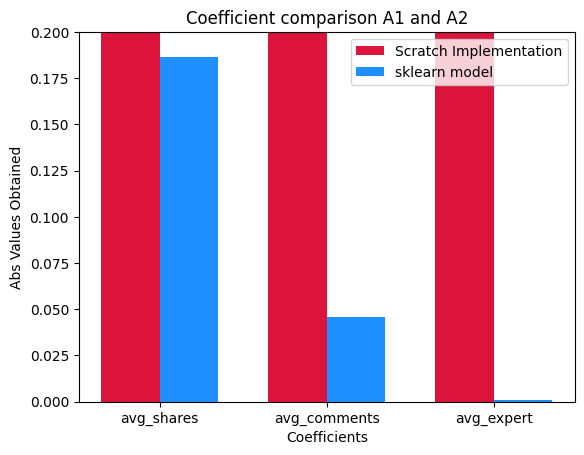

In [ ]:
label = ['avg_shares', 'avg_comments', 'avg_expert']

bar_width = 0.35
idx = np.arange(len(label))

plt.bar(idx, np.abs(wgt), bar_width, color='crimson', label ='Scratch Implementation')
plt.bar(idx + bar_width, np.abs(weight_lr), bar_width, color='dodgerblue', label='sklearn model')

plt.title('Coefficient comparison A1 and A2')
plt.xlabel('Coefficients')
plt.ylabel('Abs Values Obtained')
plt.xticks(idx+ bar_width/2, label)

plt.ylim(0, 0.2)

plt.legend()
plt.show()

B. Performance Comparison 

In [ ]:
perf_labels = ['RMSE', 'MSE', 'MAE', 'R2', 'Adjusted R2' ]

labels_scratch = [rmse, mse, mae, r2, adj_r2]
labels_sklearn = [rmse_lr,mse_lr,mae_lr,r2_lr,adj_r2_lr]


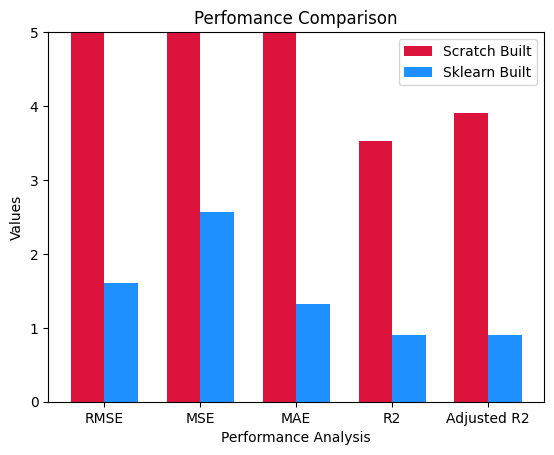

In [ ]:
indx = np.arange(len(perf_labels))

plt.bar(indx, np.abs(labels_scratch), bar_width, color='crimson', label='Scratch Built')
plt.bar(indx+bar_width, labels_sklearn, bar_width, color='dodgerblue', label='Sklearn Built')

plt.xlabel('Performance Analysis')
plt.ylabel('Values')
plt.xticks(indx + bar_width/2, perf_labels)
plt.ylim(0, 5)

plt.title('Perfomance Comparison')
plt.legend()
plt.show()

--Confidence Interval--

In [ ]:
import statsmodels.api as sm

In [ ]:
# Print the coefficients learned by the final models

labels = ['avg_shares', 'avg_comments', 'avg_expert']

print("Scratch Model:")
for i in range(len(labels)):
    label = labels[i]
    coefficient = wgt[i]
    print(label, ": ", coefficient)
print("Intercept: ", bias)

print("\nLibrary Model:")
for i in range(len(labels)):
    label = labels[i]
    coefficient = weight_lr[i]
    print(label, ": ", coefficient)
print("Intercept: ", bias_lr)

Scratch Model:
avg_shares :  -9.065597940814175e+26
avg_comments :  -7.629828434506796e+27
avg_expert :  -1.2243849527364476e+27
Intercept:  -3.953400034969269e+25

Library Model:
avg_shares :  0.1864119387830813
avg_comments :  0.045601153466801506
avg_expert :  -0.0009391483830564137
Intercept:  2.8897820893409527


--Confidence Interval and P-value--

In [ ]:
# we fit the model using statsmodels

intercepted_X_train = sm.add_constant(X_train)
intercepted_model = sm.OLS(y_train, intercepted_X_train)
result = intercepted_model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     392.0
Date:                Wed, 31 May 2023   Prob (F-statistic):           2.12e-72
Time:                        14:19:47   Log-Likelihood:                -314.35
No. Observations:                 160   AIC:                             636.7
Df Residuals:                     156   BIC:                             649.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8898      0.376      7.684      0.0

--Plot Residual Curve and Q-Q plot--

In [ ]:
import scipy.stats as stats
%matplotlib inline

In [ ]:
residual = y_test - y_pred_lr

Text(0.5, 1.0, 'Residual Curve')

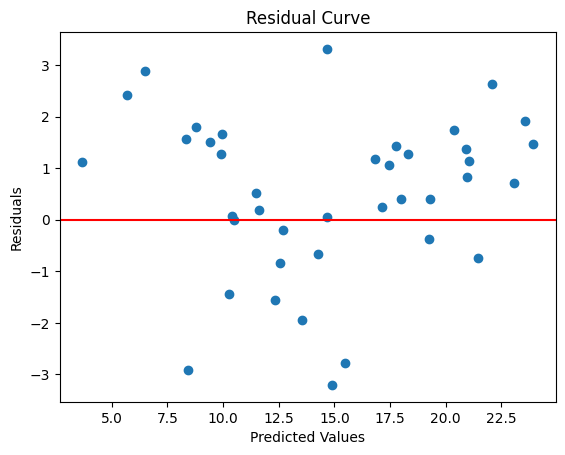

In [ ]:
plt.scatter(y_pred_lr, residual)
plt.axhline(y=0,color='r',linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Curve')

Text(0.5, 1.0, 'Q-Q Plot')

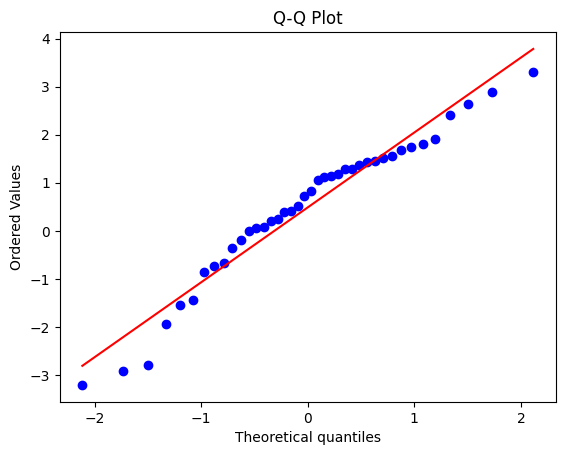

In [ ]:
stats.probplot(residual,dist='norm',plot=plt)
plt.title('Q-Q Plot')

---
# Logistic Regression
---

Supervised Learning Technique used for classification problems

# A. From Scratch

In [ ]:
df['popularity_class'] = [ 1 if (i > 12) else 0 for i in df['popularity_score']]

In [ ]:
df

,Unnamed: 0,avg_shares,avg_comments,avg_expert,popularity_score,popularity_class
0,19,147.3,23.9,19.1,14.6,1
1,91,28.6,1.5,33.0,7.3,0
2,166,17.9,37.6,21.6,8.0,0
3,196,94.2,4.9,8.1,9.7,0
4,42,293.6,27.7,1.8,20.7,1
...,...,...,...,...,...,...
195,155,4.1,11.6,5.7,3.2,0
196,80,76.4,26.7,22.3,11.8,0
197,181,218.5,5.4,27.4,12.2,1
198,145,140.3,1.9,9.0,10.3,0


In [ ]:
from sklearn.model_selection import train_test_split
X_log = df[['avg_comments','avg_shares','avg_expert']].values
y_log = df['popularity_class'].values


X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.20, random_state = 0)


In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler    
scaler= StandardScaler()    
X_train_log = scaler.fit_transform(X_train_log)    
X_test_log = scaler.transform(X_test_log)  

In [ ]:
# Logistic Regression 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


In [ ]:
def logistic_regression(X, y, num_iterations, learning_rate):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features + 1)

    for iteration in range(num_iterations):
        intercept = np.ones((num_samples, 1))
        X_intercept = np.concatenate((intercept, X), axis=1)
        logits = np.dot(X_intercept, weights)
        predictions = sigmoid(logits)
        gradient = np.dot(X_intercept.T, (predictions - y)) / num_samples
        weights -= learning_rate * gradient

    return weights

In [ ]:
weights = logistic_regression(X_train_log, y_train_log, 100, 0.01)

# Make predictions on the test set
intercept = np.ones((X_test_log.shape[0], 1))
X_test_intercept = np.concatenate((intercept, X_test_log), axis=1)
logits = np.dot(X_test_intercept, weights)
predicted_probs = sigmoid(logits)
predicted_class = np.round(predicted_probs)

mse_log = mean_squared_error(predicted_probs, y_test_log)
rmse_log = sqrt(mse_log)
mae_log = mean_absolute_error(predicted_probs, y_test_log)
r2_log = r2_score(predicted_probs, y_test_log)
adj_r2_log = 1-(1-r2_log) * (len(y_test_log)-1)/(len(y_test_log)-X_test_log.shape[1]-1)

# display errors
print(f'Mean Squared Error = {mse_log}')
print(f'Root Mean Squared Error = {rmse_log}')
print(f'Mean Absolute Error = {mae_log}')
print(f'R2 score = {r2_log}')
print(f'Adjusted R2 score = {adj_r2_log}')


# Calculate accuracy
accuracy = np.mean(predicted_class == y_test_log)
print('\n\nAccuracy:', accuracy)

Mean Squared Error = 0.17678007541427862
Root Mean Squared Error = 0.42045222726759174
Mean Absolute Error = 0.4163088058976877
R2 score = -17.89798162555833
Adjusted R2 score = -19.47281342768819


Accuracy: 0.95


# B. Using sklearn library

In [ ]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression()  
classifier.fit(X_train_log, y_train_log)  


LogisticRegression()

In [ ]:
y_pred_log_library = classifier.predict(X_test_log)

In [ ]:
mse_log = mean_squared_error(y_pred_log_library, y_test_log)
rmse_log = sqrt(mse_log)
mae_log = mean_absolute_error(y_pred_log_library, y_test_log)
r2_log = r2_score(y_pred_log_library, y_test_log)
adj_r2_log = 1-(1-r2_log) * (len(y_test_log)-1)/(len(y_test_log)-X_test_log.shape[1]-1)

In [ ]:
print("Coefficient: ", classifier.coef_)
print("Intercept: ", classifier.intercept_)


Coefficient:  [[ 1.88751237  2.80720783 -0.15215784]]
Intercept:  [0.82168595]


In [ ]:
# evaluation factors obtained
print(f'Mean Squared Error = {mse_log}')
print(f'Root Mean Squared Error = {rmse_log}')
print(f'Mean Absolute Error = {mae_log}')
print(f'R2 score = {r2_log}')
print(f'Adjusted R2 score = {adj_r2_log}')


Mean Squared Error = 0.1
Root Mean Squared Error = 0.31622776601683794
Mean Absolute Error = 0.1
R2 score = 0.5833333333333334
Adjusted R2 score = 0.5486111111111112


In [ ]:
print("Score: ", classifier.score(X_train_log,y_train_log))

Score:  0.9


In [ ]:
print(classification_report(y_test_log, y_pred_log_library))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        18
           1       0.88      0.95      0.91        22

    accuracy                           0.90        40
   macro avg       0.91      0.89      0.90        40
weighted avg       0.90      0.90      0.90        40



---
# 6. Decision Tree Classification
--- 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
X = df[['avg_shares' ,'avg_comments', 'avg_expert']]
y = df['popularity_class']

In [ ]:
classifierModel = DecisionTreeClassifier()
classifierModel.fit(X,y)

DecisionTreeClassifier()

In [ ]:
imp = classifierModel.feature_importances_
feature_list = X.columns

feature_imp = pd.DataFrame({'Feature':feature_list, 'Importance':imp})
imp_sorted = feature_imp.sort_values(by='Importance', ascending = False)
print("Features in their order of importance: ")
print(imp_sorted)

Features in their order of importance: 
        Feature  Importance
0    avg_shares    0.604251
1  avg_comments    0.362721
2    avg_expert    0.033028


Text(0.5, 1.0, 'Decision Tree Learnt')

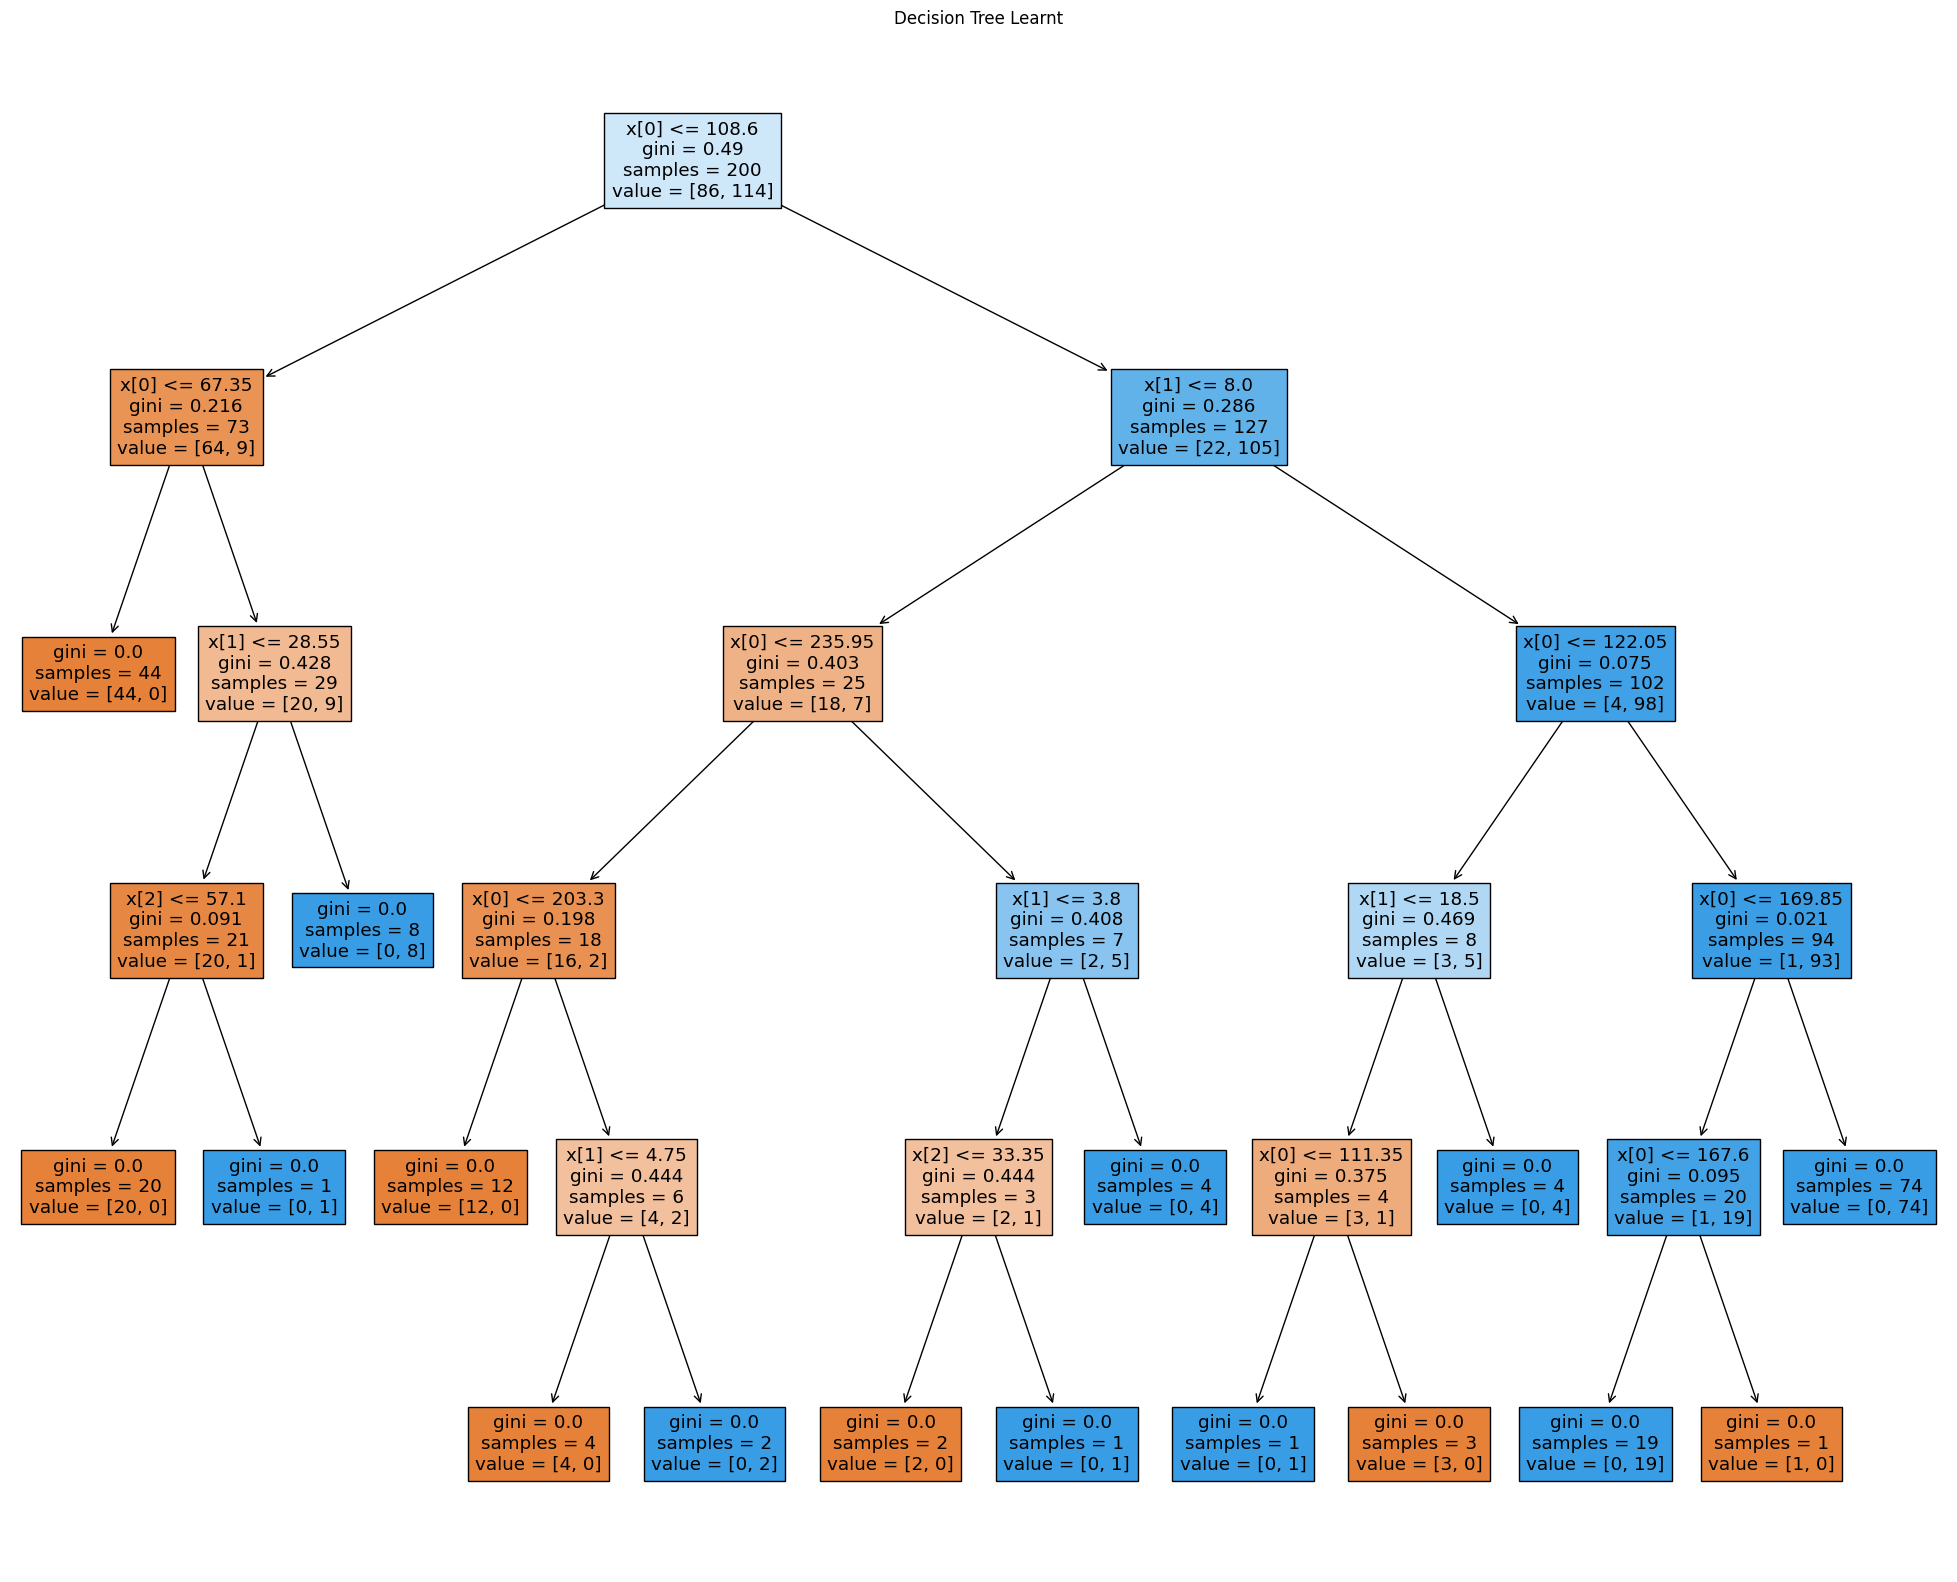

In [ ]:
# Decision Tree Learnt
fig = plt.figure(figsize=(25,20))
tree.plot_tree(classifierModel,filled=True)
plt.title('Decision Tree Learnt')

--HyperParameter Tuning--

Optimizing model's hyperparameters to improve its performance on a given dataset

# Decision Tree Forest

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
# Perform grid search with cross-validation
grid_search = GridSearchCV(classifierModel, param_grid, cv=5)
grid_search.fit(X, y)

# Display the best hyperparameters and the corresponding score
best_params_decT = grid_search.best_params_
best_score_decT = grid_search.best_score_

print("Best Parameters:", best_params_decT)
print("Best Score:", best_score_decT)

Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: 0.9350000000000002


# Random Forest Classifier

In [ ]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
classifierRF = RandomForestClassifier()
rf_grid_search = GridSearchCV(classifierRF, rf_param_grid, cv=5)
rf_grid_search.fit(X, y)

best_params_rf = rf_grid_search.best_params_
best_score_rf = rf_grid_search.best_score_

print("Best Parameters:", best_params_rf)
print("Best Score:", best_score_rf)

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.9550000000000001


# SVM Classifier

In [ ]:
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

In [ ]:
svm_clf = SVC()
svm_grid_search = GridSearchCV(svm_clf, svm_param_grid, cv=5)
svm_grid_search.fit(X, y)

best_params_svm = svm_grid_search.best_params_
best_score_svm = svm_grid_search.best_score_

print("Best Parameters:", best_params_svm)
print("Best Score:", best_score_svm)

Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best Score: 0.93


--Comparison--

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def performance_metric(classif, X, y):
  y_pred = classif.predict(X)
  
  accuracy = accuracy_score(y, y_pred)

  precision = precision_score(y, y_pred, average='weighted')

  recall = recall_score(y, y_pred, average='weighted')

  f1 = f1_score(y, y_pred, average='weighted')

  return accuracy, precision, recall, f1


In [ ]:
dt_accuracy, dt_precision, dt_recall, dt_f1 = performance_metric(grid_search.best_estimator_, X, y)
rf_accuracy, rf_precision, rf_recall, rf_f1 = performance_metric(rf_grid_search.best_estimator_, X, y)
svm_accuracy, svm_precision, svm_recall, svm_f1 = performance_metric(svm_grid_search.best_estimator_, X, y)

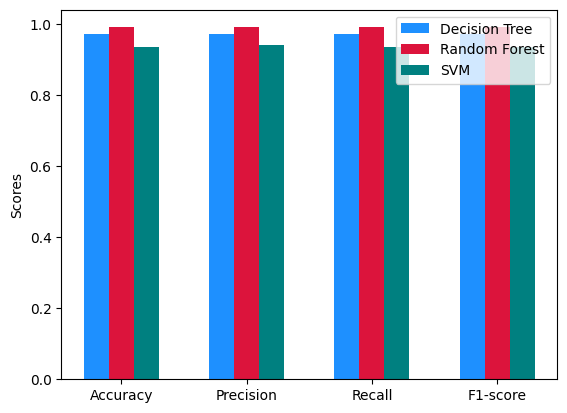

In [ ]:
# plotting of these hyperparameter

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

dt_scores = [dt_accuracy, dt_precision, dt_recall, dt_f1]
rf_scores = [rf_accuracy, rf_precision, rf_recall, rf_f1]
svm_scores = [svm_accuracy, svm_precision, svm_recall, svm_f1]


x = range(len(metrics))
width = 0.2

fig, ax = plt.subplots()
ax.bar(x, dt_scores, width, label='Decision Tree', color='dodgerblue')
ax.bar([val + width for val in x], rf_scores, width, label='Random Forest', color='crimson')
ax.bar([val + 2 * width for val in x], svm_scores, width, label='SVM', color='teal')

ax.set_ylabel('Scores')
ax.set_xticks([val + width for val in x])
ax.set_xticklabels(metrics)

ax.legend()
plt.show()


---
# Text Classification
--- 

In [ ]:
text_df = pd.read_csv('/content/a2_text - a2_text.csv')

In [ ]:
text_df

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import re

In [ ]:
text_df['sentiment'] = text_df['sentiment'].astype(str)

In [ ]:
X_txt = text_df['content']
y_txt = text_df['sentiment']

In [ ]:
# Label encode the sentiment attribute
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_txt)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_txt, y_encoded, test_size=0.2, random_state=0)


In [ ]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
classif = MultinomialNB()
classif.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred_txt = classif.predict(X_test_vec)

# Convert the predicted labels back to their original form
y_pred_label = label_encoder.inverse_transform(y_pred_txt)
y_test_label = label_encoder.inverse_transform(y_test)

acc = accuracy_score(y_pred_txt, y_test)
f1 = f1_score(y_pred_txt, y_test,average='weighted')

print("Accuracy: ",acc)
print("F1 Score: ",f1)

Accuracy:  0.28575
F1 Score:  0.36958043588661377


--PreProcessing including @mentions (P1) and removing @mentions (P2)--

--Vectorization through Bag of Words (V1) and TF-IDF method (V2)

In [ ]:
def include_mentions(text):
    return text

def remove_mentions(text):
    return re.sub(r'@\w+', '', text)

In [ ]:
vectorizers = [CountVectorizer(), TfidfVectorizer()]

In [ ]:
preprocess_methods = [include_mentions , remove_mentions]
preprocess_labels = ['Include @ mentions' , 'Remove @ mentions']

In [ ]:
precision_values_p1_v1=[]
precision_values_p1_v2=[]
precision_values_p2_v1=[]
precision_values_p2_v2=[]

recall_values_p1_v1=[]
recall_values_p1_v2=[]
recall_values_p2_v1=[]
recall_values_p2_v2=[]

In [ ]:
for i, preprocess_method in enumerate(preprocess_methods):
  
  X_processed = X_txt.apply(preprocess_method)

  label_encoder = LabelEncoder()
  y_encoded = label_encoder.fit_transform(y_txt)

  X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.2, random_state=0)


  for j, vectorizer in enumerate(vectorizers):
    
    # Vectorize the text data using the current vectorizer
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # Instantiate and fit the Naive Bayes classifier
    clf = MultinomialNB()
    clf.fit(X_train_vec, y_train)

    y_pred = clf.predict(X_test_vec)

    # Convert the labels back to their original form
    y_pred_label = label_encoder.inverse_transform(y_pred)

    y_test_label = label_encoder.inverse_transform(y_test)

    report = classification_report(y_test_label, y_pred_label, zero_division=0, output_dict=True)
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']

    # Append the precision and recall values to the lists
    
    if i == 0 and j == 0:
      precision_values_p1_v1.append(precision)
      recall_values_p1_v1.append(recall)
    elif i == 0 and j == 1:
      precision_values_p1_v2.append(precision)
      recall_values_p1_v2.append(recall)
    elif i == 1 and j == 0:
      precision_values_p2_v1.append(precision)
      recall_values_p2_v1.append(recall)
    elif i == 1 and j == 1:
      precision_values_p2_v2.append(precision)
      recall_values_p2_v2.append(recall)

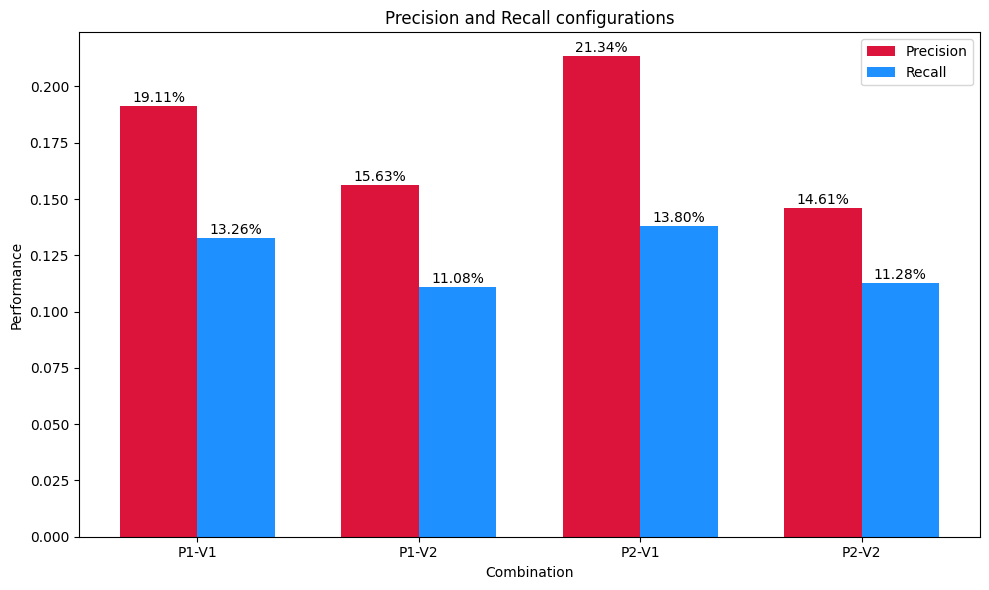

In [ ]:
labels = ['P1-V1', 'P1-V2', 'P2-V1', 'P2-V2']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
precision_bars = ax.bar(x - width/2, precision_values_p1_v1 + precision_values_p1_v2 + precision_values_p2_v1 + precision_values_p2_v2, width, label='Precision', color='crimson')
recall_bars = ax.bar(x + width/2, recall_values_p1_v1 + recall_values_p1_v2 + recall_values_p2_v1 + recall_values_p2_v2, width, label='Recall', color='dodgerblue')

ax.set_xlabel('Combination')
ax.set_ylabel('Performance')
ax.set_title('Precision and Recall configurations')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2%}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center')

autolabel(precision_bars)
autolabel(recall_bars)

fig.tight_layout()

plt.show()